In [69]:
import cv2
from PIL import Image
import numpy as np
data_path = "..\\dataset\\classifer\\train\\Black-grass\\adwstlhujk.png"
# data_path = "..\\dataset\classifer\\train\Charlock\\anctmubvdy.png"

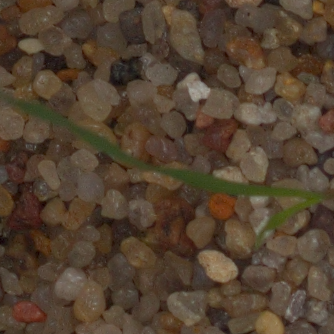

In [70]:
img = Image.open(data_path)
img

In [71]:
img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)  
cv2.imshow("black-grass", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [72]:
# 创建SIFT特征检测器
sift = cv2.SIFT_create()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 特征点提取与描述子生成
kp, des = sift.detectAndCompute(img,None)
print(kp, des)

(< cv2.KeyPoint 000001CAB25FD0C0>, < cv2.KeyPoint 000001CAB5B59240>, < cv2.KeyPoint 000001CAB5B59630>, < cv2.KeyPoint 000001CAB5B59390>, < cv2.KeyPoint 000001CAB5B59C30>, < cv2.KeyPoint 000001CAB5B59AE0>, < cv2.KeyPoint 000001CAB5B597B0>, < cv2.KeyPoint 000001CAB5B59B10>, < cv2.KeyPoint 000001CAB5B59FC0>, < cv2.KeyPoint 000001CAB5B59300>, < cv2.KeyPoint 000001CAB5B59F60>, < cv2.KeyPoint 000001CAB5B59840>, < cv2.KeyPoint 000001CAB5B59A50>, < cv2.KeyPoint 000001CAB5B596F0>, < cv2.KeyPoint 000001CAB5B597E0>, < cv2.KeyPoint 000001CAB5B59E70>, < cv2.KeyPoint 000001CAB5B59B70>, < cv2.KeyPoint 000001CAB5B59090>, < cv2.KeyPoint 000001CAB5B59780>, < cv2.KeyPoint 000001CAB5B59870>, < cv2.KeyPoint 000001CAB5B59BA0>, < cv2.KeyPoint 000001CAB5B596C0>, < cv2.KeyPoint 000001CAB5B593F0>, < cv2.KeyPoint 000001CAAD993120>, < cv2.KeyPoint 000001CAAD9930F0>, < cv2.KeyPoint 000001CAAD9935D0>, < cv2.KeyPoint 000001CAAD993210>, < cv2.KeyPoint 000001CAAD993030>, < cv2.KeyPoint 000001CAAD993AE0>, < cv2.KeyPoin

In [73]:
type(img), img.shape

(numpy.ndarray, (334, 334, 3))

In [74]:
type(des), des.shape

(numpy.ndarray, (342, 128))

In [75]:
cv2.imshow("des", des)
cv2.waitKey()
cv2.destroyAllWindows()

In [76]:
img4show = img.copy()
cv2.drawKeypoints(img, kp, img4show)
cv2.imshow("des", img4show)
cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
# 自适应 阈值锐化
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

med = np.median(gray)
lower = int(max(0, (1.0 - 0.33) * med))
upper = int(min(255, (1.0 + 0.33) * med))
edges = cv2.Canny(gray, lower, upper)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharp1 = cv2.filter2D(gray, -1, kernel)
sharp2 = cv2.filter2D(edges, -1, kernel)

alpha = 0.5
beta = 1 - alpha
sharped = alpha * sharp1 + beta * sharp2

sharped[sharped>255] = 255
sharped[sharped<0] = 0
sharped = np.uint8(sharped)

cv2.imshow('Sharp Image', sharped)
cv2.waitKey(0)
cv2.destroyAllWindows()

70.0


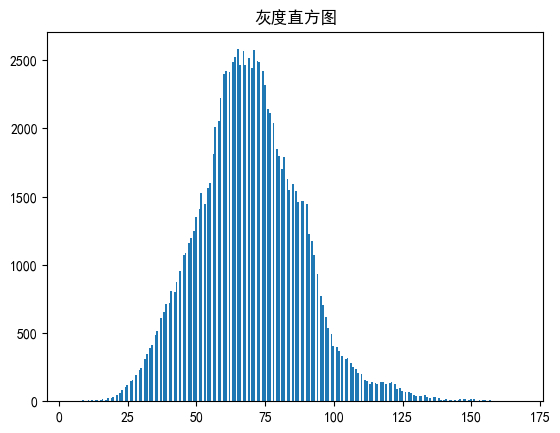

-1

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread(data_path, 0)
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # 简单滤波
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Otsu滤波
print(ret2)
cv2.imshow('img', img)
cv2.imshow('th1', th1)
cv2.imshow('th2', th2)
# 解决matplotlib中显示图像的中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.hist(img.ravel(), 256)
plt.title('灰度直方图')
plt.show()
cv2.waitKey(0)

In [77]:
# 图像均衡化
def equalize(image):
    # 分割B,G,R （cv2读取图像的格式即为[B,G,R]，与matplotlib的[R,G,B]不同）
    b,g,r = cv2.split(image)
    b = cv2.equalizeHist(b)
    g = cv2.equalizeHist(g)
    r = cv2.equalizeHist(r)
    equ_img = cv2.merge((b,g,r))
    return equ_img

equ_img = equalize(img)
cv2.imshow("equ", equ_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [81]:
def extractGreen(image):
    # 绿色范围
    lower_green = np.array([35, 43, 46], dtype="uint8")  # 颜色下限
    upper_green = np.array([90, 255, 255], dtype="uint8")  # 颜色上限
    
    # 高斯滤波
    # img_blur = cv2.GaussianBlur(image, (11, 11), 0)
    # 中值滤波
    # img_blur = cv2.medianBlur(image, 11)
    img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # 根据阈值找到对应颜色，二值化
    mask = cv2.inRange(img_hsv, lower_green, upper_green)
    cv2.imshow("mask", mask)
    cv2.waitKey()
    cv2.destroyAllWindows()
    
    # 按位与
    output = cv2.bitwise_and(image, image, mask=mask)

    return output

ext_img = extractGreen(equ_img)
cv2.imshow("ext", ext_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [44]:
ext_img_blur = cv2.medianBlur(ext_img, 11)
cv2.imshow("ext", ext_img_blur)
cv2.waitKey()
cv2.destroyAllWindows()

In [79]:
# 创建SIFT特征检测器
sift_after = cv2.SIFT_create()
# 特征点提取与描述子生成
kp_after, des_after = sift_after.detectAndCompute(ext_img,None)
# print(kp, des)
img4show_after = ext_img.copy()
cv2.drawKeypoints(ext_img, kp_after, img4show_after)
cv2.imshow("des", img4show_after)
cv2.waitKey()
cv2.destroyAllWindows()